In [1]:
#memanggil library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read file
df = pd.read_csv('ObesityDataSet1.csv')

In [3]:
#tampilin 5 data teratas
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [4]:
print(df.columns) #cek ada kolom apa aja
print(df.shape) #cek ukuran datanya
print(df.info()) #informasi data

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
(1055, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   obj

In [5]:
#cek apakah ada kolom yg null
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,26
SMOKE,0


In [6]:
#cek missing value yang float apakah lebih dari 40% atau engga
missing_percent1 = df['TUE'].isnull().mean() * 100
print(f"Missing value di kolom 'TUE': {missing_percent1:.2f}%")

Missing value di kolom 'TUE': 3.51%


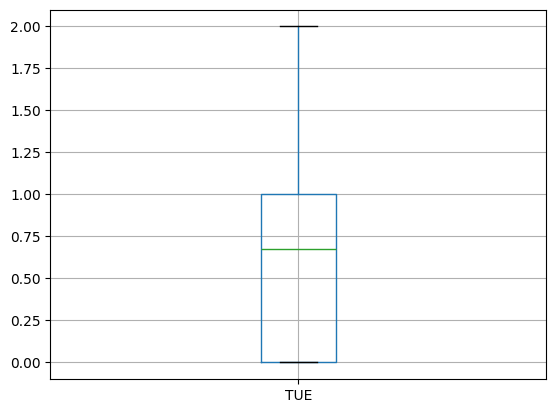

In [7]:
#krn < 40% maka ga di drop, coba cek dia ada outlier atau engga
boxplot = df.boxplot(column=['TUE'])
plt.show()

In [8]:
#krn gak ada outlier, jadinya kita pake mean
print('mean TUE: ', df['TUE'].mean())

mean TUE:  0.6769774066797642


In [9]:
#hasilnya dipake untuk isi null nya
df['TUE'] = df['TUE'].fillna(0.676)

In [10]:
modus = df['CAEC'].mode()[0]
print(f"Modus dari kolom 'CAEC': {modus}")

Modus dari kolom 'CAEC': Sometimes


In [11]:
df['CAEC'] = df['CAEC'].fillna(modus)

In [12]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [13]:
#cek tiap kolom kategorik ada kategori yang salah atau engga

print(df['Gender'].value_counts())
print(df['Age'].value_counts())
print(df['family_history_with_overweight'].value_counts())
print(df['FAVC'].value_counts())
print(df['CAEC'].value_counts())
print(df['SMOKE'].value_counts())
print(df['SCC'].value_counts())
print(df['CALC'].value_counts())
print(df['MTRANS'].value_counts())
print(df['NObeyesdad'].value_counts())

Gender
Male      536
Female    519
Name: count, dtype: int64
Age
26          108
18          101
21          101
23           97
22           87
19           87
20           79
24           53
25           46
31           33
17           32
30           24
27           22
29           20
33           16
39           14
34           14
37           13
32           11
40           11
28           11
41           11
38           11
35           10
16            8
42            4
18 years      4
21 years      3
36            3
44            2
26 years      2
43            2
55            2
44 years      1
56            1
19 years      1
22 years      1
61            1
23 years      1
52            1
20 years      1
51            1
45            1
47            1
32 years      1
33 years      1
Name: count, dtype: int64
family_history_with_overweight
yes    864
no     191
Name: count, dtype: int64
FAVC
yes    931
no     124
Name: count, dtype: int64
CAEC
Sometimes     897
Frequently    112


In [14]:
# Hapus years dan ubah age dari object ke float
df['Age'] = df['Age'].str.replace('years', '', case=False)
df['Age'] = df['Age'].str.strip()
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

print(df['Age'].value_counts().sort_index())

Age
16      8
17     32
18    105
19     88
20     80
21    104
22     88
23     98
24     53
25     46
26    110
27     22
28     11
29     20
30     24
31     33
32     12
33     17
34     14
35     10
36      3
37     13
38     11
39     14
40     11
41     11
42      4
43      2
44      3
45      1
47      1
51      1
52      1
55      2
56      1
61      1
Name: count, dtype: int64


In [15]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}: {len(outliers)} rows")

Outliers in Age: 80 rows
Outliers in Height: 0 rows
Outliers in Weight: 0 rows
Outliers in FCVC: 0 rows
Outliers in NCP: 306 rows
Outliers in CH2O: 0 rows
Outliers in FAF: 0 rows
Outliers in TUE: 0 rows


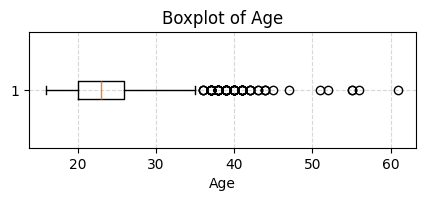

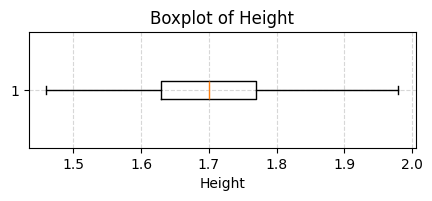

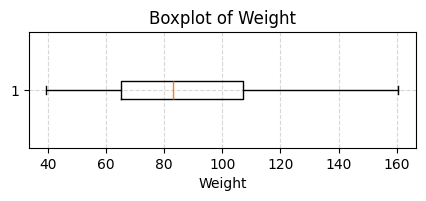

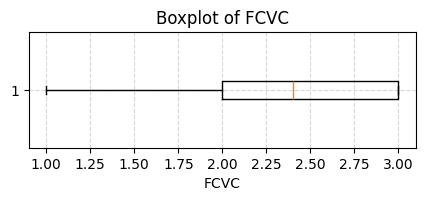

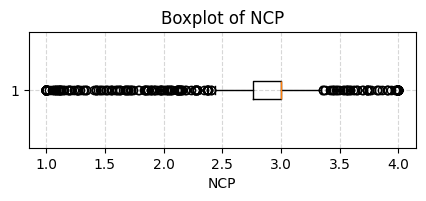

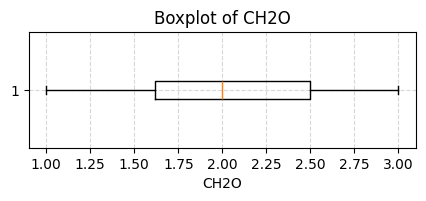

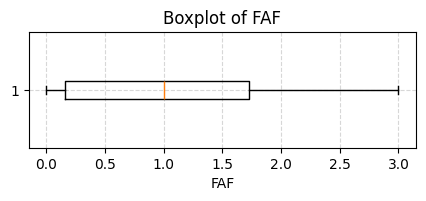

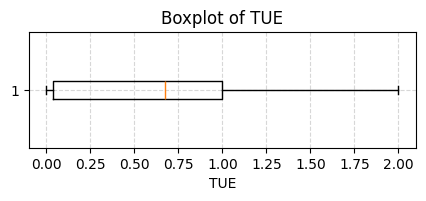

In [16]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(5, 1.5))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score

numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_columns = ['family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_columns = 'NObeyesdad'

In [20]:
from sklearn.preprocessing import LabelEncoder

binary_mapping = {
    "Gender": {"Female": 0, "Male": 1}
}

df = df.replace(binary_mapping)

/tmp/ipython-input-20-329252508.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(binary_mapping)


In [21]:
le_target = LabelEncoder()
df[target_columns] = le_target.fit_transform(df[target_columns])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Pisahkan fitur dan target
X = df.drop(columns=[target_columns])
y = df[target_columns]

In [23]:
#split data jadi training n testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
#buat tau brp ukurannya
print('train data: ',X_train.shape)
print('test data: ',X_test.shape)

train data:  (844, 16)
test data:  (211, 16)


In [25]:
feature_categories_for_encoder = [
    ['no', 'yes'],                                # family_history_with_overweight
    ['no', 'yes'],                                # FAVC
    ['no', 'Sometimes', 'Frequently', 'Always'],  # CAEC
    ['no', 'yes'],                                # SMOKE
    ['no', 'yes'],                                # SCC
    ['no', 'Sometimes', 'Frequently', 'Always'],  # CALC
    ['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking'] # MTRANS
]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=feature_categories_for_encoder, handle_unknown='use_encoded_value', unknown_value=-1))
])

In [26]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough'
)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Train dan evaluasi RF
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9478672985781991
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.84      0.90      0.87        29
           2       1.00      0.93      0.96        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        32
           5       0.87      0.90      0.88        29
           6       0.94      0.97      0.95        32

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



In [29]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train dan evaluasi XGB
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:57:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9620853080568721
XGBoost Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.96      0.83      0.89        29
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        32
           5       0.90      0.93      0.92        29
           6       0.94      1.00      0.97        32

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5,
                       scoring='f1_macro', n_jobs=-1, verbose=2)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)
print("🎯 [Random Forest] Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("🎯 [Random Forest] Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
🎯 [Random Forest] Test Accuracy: 0.95260663507109
🎯 [Random Forest] Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.84      0.93      0.89        29
           2       0.97      0.97      0.97        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        32
           5       0.90      0.90      0.90        29
           6       0.97      0.94      0.95        32

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



In [31]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

param_dist_xgb = {
    'clf__n_estimators': [100, 200],  # Disamakan jumlahnya
    'clf__max_depth': [5, 10],
    'clf__learning_rate': [0.01, 0.1],
    'clf__subsample': [0.8, 1.0],
    'clf__colsample_bytree': [0.8, 1.0]
}

random_xgb = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist_xgb,
                                 n_iter=10, scoring='f1_macro', cv=5,
                                 random_state=42, n_jobs=-1, verbose=2)

random_xgb.fit(X_train, y_train)

y_pred_xgb = random_xgb.predict(X_test)
print("🚀 [XGBoost] Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("🚀 [XGBoost] Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:58:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🚀 [XGBoost] Test Accuracy: 0.976303317535545
🚀 [XGBoost] Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.96      0.93      0.95        29
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        32
           5       0.96      0.93      0.95        29
           6       0.91      1.00      0.96        32

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211



In [32]:
import pickle

best_model = random_xgb.best_estimator_

with open('best_model_xgboost.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [33]:
from google.colab import files
files.download('best_model_xgboost.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>